<a href="https://colab.research.google.com/github/Maks6666/ML/blob/main/clustering_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання

Провести кластеризацію клієнтів. [Опис даних](https://www.kaggle.com/datasets/dev0914sharma/customer-clustering?select=segmentation+data.csv)

* перевірте дані на пропущені значення
* нормалізуйте дані за допомогою:
  1. StandartScaler
  2. MinMaxScaler
* Визначіть оптимальну кількість кластерів за допомогою методу "ліктя". Оберіть метрики:
  1. distortion
  2. silhouette
  3. calinski_harabasz
* Визначіть оптимальну кількість кластерів за силуетних діаграм
* Обрахуйте середні(або медіанні) значення по кожному кластеру та візуалізуйте результат. Дайте опис кластерам
* Проведіть кластеризацію для очищених від викидів даних


In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module7/data/segmentation%20data.csv')

df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.set_output(transform="pandas")

data = scaler.fit_transform(df)

data

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0.000000,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0
1,0.000500,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0
2,0.001001,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0
3,0.001501,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5
4,0.002001,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5
...,...,...,...,...,...,...,...,...
1995,0.997999,1.0,0.0,0.500000,0.333333,0.320595,0.0,0.0
1996,0.998499,1.0,1.0,0.155172,0.333333,0.299460,0.5,0.0
1997,0.998999,0.0,0.0,0.224138,0.000000,0.184871,0.0,0.0
1998,0.999500,1.0,1.0,0.103448,0.333333,0.227162,0.0,0.0


In [4]:
data = data.drop("ID", axis="columns")
data

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0
2,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0
3,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5
4,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5
...,...,...,...,...,...,...,...
1995,1.0,0.0,0.500000,0.333333,0.320595,0.0,0.0
1996,1.0,1.0,0.155172,0.333333,0.299460,0.5,0.0
1997,0.0,0.0,0.224138,0.000000,0.184871,0.0,0.0
1998,1.0,1.0,0.103448,0.333333,0.227162,0.0,0.0


In [5]:
data.isnull().sum()

,0
Sex,0
Marital status,0
Age,0
Education,0
Income,0
Occupation,0
Settlement size,0


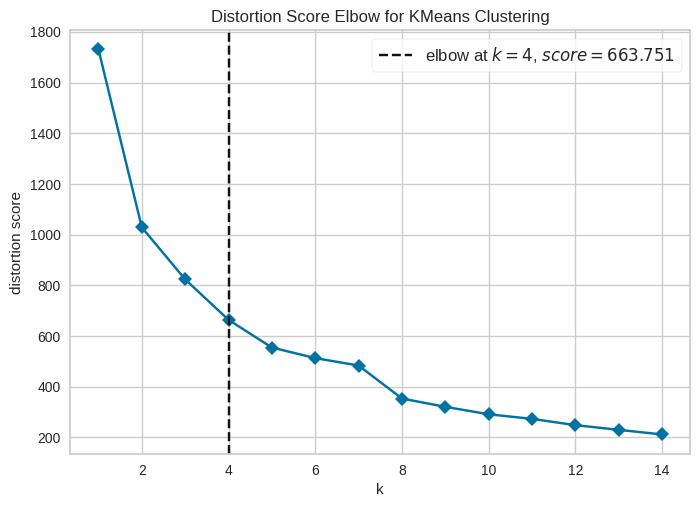

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans(n_init='auto', random_state=42)
visualizer = KElbowVisualizer(model,
                              k=(1, 15),
                              timings=False,
                              metric='distortion',
                              distance_metric='euclidean'
                              )

visualizer.fit(data)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


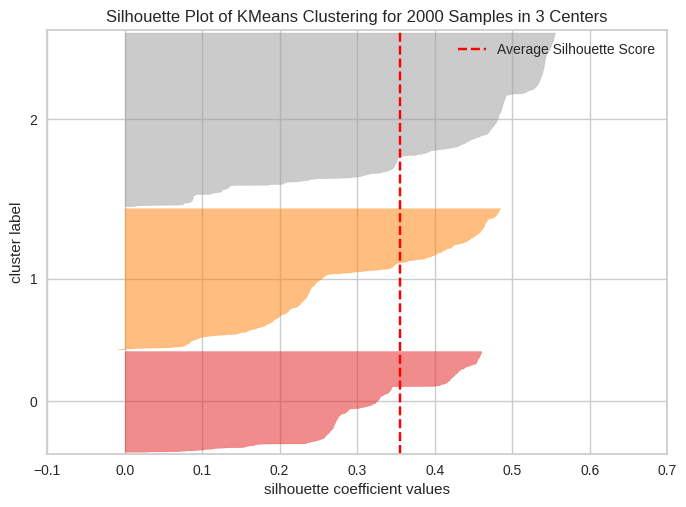

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2000 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [9]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(KMeans(3))
visualizer.fit(data)
visualizer.show()



In [10]:
model = KMeans(3)

model.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [12]:
model.labels_[:20]

array([2, 0, 1, 2, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 0, 0, 1, 2, 0, 2],
      dtype=int32)

In [14]:
df["cluster_id"] = model.labels_
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster_id
0,100000001,0,0,67,2,124670,1,2,2
1,100000002,1,1,22,1,150773,1,2,0
2,100000003,0,0,49,1,89210,0,0,1
3,100000004,0,0,45,1,171565,1,1,2
4,100000005,0,0,53,1,149031,1,1,2
...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,1
1996,100001997,1,1,27,1,117744,1,0,0
1997,100001998,0,0,31,0,86400,0,0,1
1998,100001999,1,1,24,1,97968,0,0,0


In [18]:
data["cluster_id"] = model.labels_
data

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster_id
0,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0,2
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0,0
2,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0,1
3,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5,2
4,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5,2
...,...,...,...,...,...,...,...,...
1995,1.0,0.0,0.500000,0.333333,0.320595,0.0,0.0,1
1996,1.0,1.0,0.155172,0.333333,0.299460,0.5,0.0,0
1997,0.0,0.0,0.224138,0.000000,0.184871,0.0,0.0,1
1998,1.0,1.0,0.103448,0.333333,0.227162,0.0,0.0,0


In [19]:
results = data.groupby(by="cluster_id").mean()

results

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
cluster_id,,,,,,,
0,1.000000,1.000000,0.261947,0.420743,0.294701,0.370924,0.284647
1,0.302926,0.165232,0.309306,0.288009,0.235195,0.184165,0.027539
2,0.002928,0.235725,0.358787,0.314788,0.393626,0.630307,0.751830


<Axes: xlabel='cluster_id'>

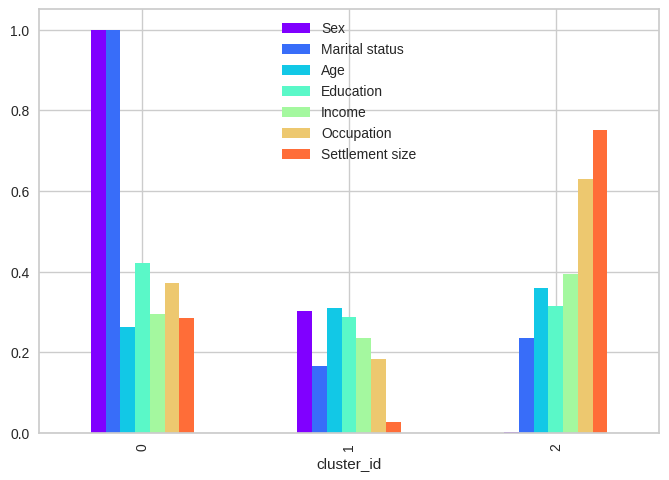

In [20]:
import numpy as np
color = plt.cm.rainbow(np.linspace(0, 1, data.shape[1]))

results.plot(kind='bar', color=color)